## Example Project #1

### An Analysis on the Unemployment Rates in the United States of America as of February 2019

<dl>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For this project, the data provided by the Bureau of Labor Statistics will aim to reveal the disrecpancies in employment statuses for people of different backgrounds as of February 2019. Specifically, this project will explore the discrepancies in employment statuses of U.S. citizens based on age, race, education, and sex. Furthermore, this project will attempt to illuminate differences between unemployment rates for men and women either enrolled or not enrolled in school across all races, unemployment rates for varying age ranges either enrolled or not enrolled in school across all races, and unemployment rates for individuals with varying educational attainment levels across all races. Foremost, this project will explore a general analysis of the data provided by the <a href="https://www.bls.gov/web/empsit/cpseea16.htm">Bureau of Labor Statistics</a>. Moreover, this project will utilize bar graphs to portray pair wise relationships and Chi-Square Tests of Homogeneity for hypothesis testing.  
</dl>
<d9>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Because the sample sizes for each race are not the equal to each other, this project will predominantly assess the unemployment percentages of each race given a specific criteria. This percentage is derived from taking the amount of people unemployed from a given criteria and dividing it by the total sample size of each distinct race and criteria. For example, the percentage of unemployed individuals who are female  and Hispanic or Latino is derived by taking the number of unemployed persons who are female and Hispanic or Latino and dividing  it by the total amount of people who are female and Hispanic or Latino. 
</d9>

###    **NOTE: Markdown notes are located at the end of each subsection or section to clarify the data displayed.**

The dataset that is used in this project is from the <a href="https://www.bls.gov/web/empsit/cpseea16.htm">Bureau of Labor Statistics</a>, but has been imported as a csv file and altered for ease of use.

In [106]:
#This block of code is for importing the packages that are utilized in this project.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## Dataset

This section imports the dataset and provides a brief representation of the general dataset.

In [107]:
#This block of code imports both the local csv file and the online dataset.
data_origin = pd.read_html('https://www.bls.gov/web/empsit/cpseea16.htm')
data = pd.read_csv('Employment.csv', header = 0).dropna()
data['Percentage of Unemployed'] = data['Total(Unemployed)'] /(data['Total(Employed)'] + data['Total(Unemployed)'])
data['Total'] = (data['Total(Employed)'] + data['Total(Unemployed)'])
data

,"Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment",Total(Employed),Full time,Part time,Total(Unemployed),Looking for full-time work,Looking for part-time work,Race,Enrolled in School,Civilian noninstitutional population,Total Non-institutional,Percentage of Unemployed,Total
1,"Total, 16 to 24 years",6863.0,1448.0,5414.0,621.0,154.0,467.0,General,Enrolled,21704.0,7484.0,0.082977,7484.0
2,16 to 19 years,3135.0,300.0,2835.0,405.0,49.0,355.0,General,Enrolled,13745.0,3539.0,0.114407,3540.0
3,20 to 24 years,3728.0,1148.0,2580.0,217.0,105.0,112.0,General,Enrolled,7959.0,3945.0,0.055006,3945.0
4,Men,3010.0,715.0,2296.0,348.0,88.0,259.0,General,Enrolled,10578.0,3358.0,0.103633,3358.0
5,Women,3852.0,734.0,3119.0,274.0,66.0,208.0,General,Enrolled,11125.0,4126.0,0.066408,4126.0
6,High school,1980.0,94.0,1885.0,337.0,35.0,302.0,General,Enrolled,10782.0,2317.0,0.145447,2317.0
7,College,4883.0,1354.0,3529.0,284.0,119.0,165.0,General,Enrolled,10921.0,5167.0,0.054964,5167.0
8,Full-time students,3798.0,839.0,2959.0,220.0,80.0,140.0,General,Enrolled,9467.0,4018.0,0.054754,4018.0
9,Part-time students,1085.0,515.0,570.0,64.0,39.0,25.0,General,Enrolled,1454.0,1149.0,0.055701,1149.0
11,"Total, 16 to 24 years",5331.0,1114.0,4217.0,424.0,81.0,343.0,White,Enrolled,15811.0,5755.0,0.073675,5755.0


## Exploratory Analysis on Unemployment Rates (by percentage)

##### Gender Analysis (Percentage of Unemployed):

In [108]:
data_2 = data.iloc[45:]

In [109]:
#Reorganizing dataset to represent unemployment rates for males and females across all races.
d1m = data[data['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'Men']['Percentage of Unemployed'].head()
d2f = data[data['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'Women']['Percentage of Unemployed'].head()
d1m_2 = data_2[data_2['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'Men']['Percentage of Unemployed'].head()
d2f_2 = data_2[data_2['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'Women']['Percentage of Unemployed'].head()
d3S = d1m.append(d2f).append(d1m_2).append(d2f_2).drop([4, 5, 54, 55])
d3S

14    0.095238
24    0.174334
34    0.063584
44    0.102564
15    0.056413
25    0.155983
35    0.083721
45    0.095816
64    0.082173
74    0.208205
84    0.033613
94    0.098862
65    0.070155
75    0.169043
85    0.143860
95    0.101195
Name: Percentage of Unemployed, dtype: float64

In [110]:
#Median value of the unemployment percentage for males and females.
d3S.median()

0.09733902900312033

In [111]:
#Max value of the unemployment percentage for males and females.
d3S.max()

#African American men who are not enrolled in school.

0.2082051282051282

In [112]:
#Min value of the unemployment percentage for males and females.
d3S.min()
#Asian men who are not enrolled in school.

0.03361344537815126

##### Age Analysis (Percentage of Unemployed):

In [113]:
#Reorganizing dataset to represent unemployment rates for different age ranges across all races.
d1a = data[data['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == '16 to 19 years']['Percentage of Unemployed'].head()
d2a = data[data['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == '20 to 24 years']['Percentage of Unemployed'].head()
d1a_2 = data_2[data_2['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == '16 to 19 years']['Percentage of Unemployed'].head()
d2a_2 = data_2[data_2['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == '20 to 24 years']['Percentage of Unemployed'].head()

d3a = d1a.append(d2a).append(d1a_2).append(d2a_2).drop([2, 3, 52, 53])
d3a

12    0.105979
22    0.245098
32    0.000000
42    0.137085
13    0.043537
23    0.095137
33    0.111111
43    0.065823
62    0.157973
72    0.275660
82    0.342105
92    0.225743
63    0.063527
73    0.170173
83    0.074227
93    0.075705
Name: Percentage of Unemployed, dtype: float64

In [114]:
#Median value of the unemployment percentage for different age ranges.
d3a.median()

0.10854517245494688

In [115]:
#Max value of the unemployment percentage for different age ranges.
d3a.max()

#Asian persons who are 16 to 19 years old and are NOT enrolled in school.

0.34210526315789475

In [116]:
#Min value of the unemployment percentage for different age ranges.
d3a.min()

#Asian persons who are 16 to 19 years old and are enrolled in school.

0.0

##### Educational Level (Percentage of Unemployed):

In [117]:
#Reorganizing dataset to represent unemployment rates for educational attainment levels across all races.
d_1 = data[data['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'Less than a high school diploma']['Percentage of Unemployed'].head()
d_2 = data[data['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == "High school graduates, no college(1)"]['Percentage of Unemployed'].head()
d_3 = data[data['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'Some college or associate degree']['Percentage of Unemployed'].head()
d_4 = data[data['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == "Bachelor's degree and higher(2)"]['Percentage of Unemployed'].head()
d_t = d_1.append(d_2).append(d_3).append(d_4)
d_t

56    0.208059
66    0.165179
76    0.340102
86    0.695652
96    0.149123
57    0.116581
67    0.083168
77    0.223291
87    0.129032
97    0.113388
58    0.076595
68    0.071511
78    0.113761
88    0.097744
98    0.069536
59    0.040164
69    0.032661
79    0.108303
89    0.016461
99    0.041353
Name: Percentage of Unemployed, dtype: float64

In [118]:
#Median value of the unemployment percentage for different educational attainment levels.
d_t.median()

0.11084561361977471

In [119]:
#Max value of the unemployment percentage for different educational attainment levels.
d_t.max()

#Asian with less than a high school diploma.

0.6956521739130435

In [120]:
#Min value of the unemployment percentage for different educational attainment levels.
d_t.min()

#Asian with Bachelor's Degree or higher.

0.01646090534979424

<d2>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Based on this general exploratory analysis of the dataset on unemployment rates/percentages for varying backgrounds, it is evident that there are variations in unemployment percentages depending on a given criteria. For instance, 0.6956521739130435% of Asian people with less than a high school diploma were unemployed, whereas 0% of Asian people who are 16 to 19 years old and are enrolled in school were unemployed. This data is expected because these unemployment percentages rely on different variables or criteria. Furthermore, as suggested by the analysis, African American men who were not enrolled in school seemed to have the highest unemployment rate of 0.2082051282051282% in terms of gender, race, and school enrollment. As for the case of age, race, and school enrollment, Asian persons who are 16 to 19 years old and are not enrolled in school had the highest unemployment rate of 0.34210526315789475%. Moreover, Asian individuals with less than a high school diploma had the highest unemployment rate of 0.6956521739130435% in terms of educational attainment level and race. In general, the people who were of either Asian or African American ethnicity appeared to represent either the population with the highest unemployment rate or the lowest unemployment rate for the given standards of this project; however, it is also imperative to consider that the sample size of Asian persons in this dataset is the smallest amongst all other racial backgrounds. Through this data exploration, it seems that there is a discernible discrepancy in unemployment rates 
</d2>

## Visualizations and Pair-Wise Explorations

To expand on the previous section's analysis of the dataset, this section will provide visualizations of the dataset through bar graphs.

### 1. Unemployment Rates For Different Sexes and Races

#### Enrolled in School:

In [121]:
#Reorganzing data based on gender and school enrollment.
data_sex = data[['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment', 'Total(Employed)', 'Total(Unemployed)', 'Race']]
data_sex.head()
d_men = data_sex[data_sex['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'Men'].head()
d_women = data_sex[data_sex['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'Women'].head()
d_sexes = d_men.append(d_women)
d_sexes['Percentage of Unemployed'] = d_sexes['Total(Unemployed)'] /(d_sexes['Total(Employed)'] + d_sexes['Total(Unemployed)'])
d_sexes['Total'] = (d_sexes['Total(Employed)'] + d_sexes['Total(Unemployed)'])
d_sexes

,"Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment",Total(Employed),Total(Unemployed),Race,Percentage of Unemployed,Total
4,Men,3010.0,348.0,General,0.103633,3358.0
14,Men,2337.0,246.0,White,0.095238,2583.0
24,Men,341.0,72.0,Black or African American,0.174334,413.0
34,Men,162.0,11.0,Asian,0.063584,173.0
44,Men,665.0,76.0,Hispanic or Latino ethnicity,0.102564,741.0
5,Women,3852.0,274.0,General,0.066408,4126.0
15,Women,2994.0,179.0,White,0.056413,3173.0
25,Women,395.0,73.0,Black or African American,0.155983,468.0
35,Women,197.0,18.0,Asian,0.083721,215.0
45,Women,670.0,71.0,Hispanic or Latino ethnicity,0.095816,741.0


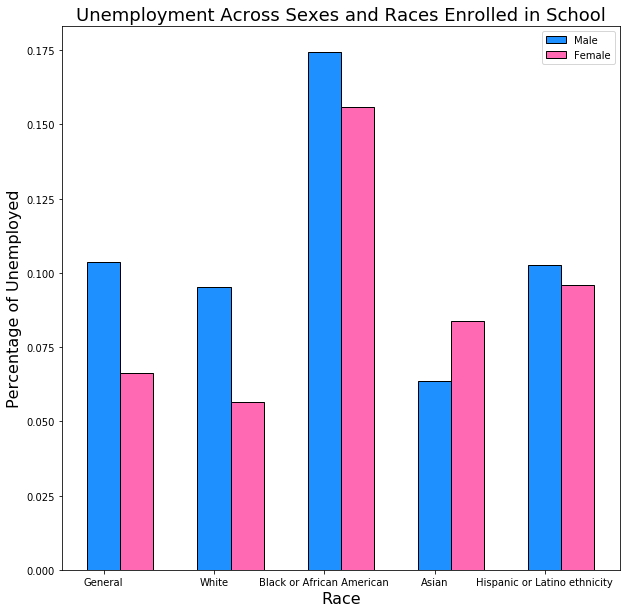

In [122]:
#Plotting a bar graph to see differences in unemployment rates.
pos = np.arange(5)
bar_width = 0.30
Sex=['Male','Female']
fig = plt.figure(figsize=(10,10))
plt.bar(pos,d_sexes[d_sexes['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'Men']['Percentage of Unemployed'],bar_width,color='dodgerblue',edgecolor='black')
plt.bar(pos+bar_width,d_sexes[d_sexes['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'Women']['Percentage of Unemployed'],bar_width, color='hotpink',edgecolor='black')
plt.xticks(pos, d_sexes['Race'])
plt.xlabel('Race', fontsize=16)
plt.ylabel('Percentage of Unemployed', fontsize=16)
plt.title('Unemployment Across Sexes and Races Enrolled in School',fontsize=18)
plt.legend(Sex,loc=1)
plt.show()

#### Not Enrolled in School:

In [123]:
#Reorganzing data based on gender and school enrollment (not in school).
data_2 = data.iloc[45:]
data_sex_2 = data_2[['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment', 'Total(Employed)', 'Total(Unemployed)', 'Race', 'Enrolled in School']]
data_sex_2.head()
d_men_2 = data_sex_2[data_sex_2['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'Men'].head()
d_women_2 = data_sex_2[data_sex_2['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'Women'].head()
d_sexes_2 = d_men_2.append(d_women_2)
d_sexes_2['Percentage of Unemployed'] = d_sexes_2['Total(Unemployed)'] /(d_sexes_2['Total(Employed)'] + d_sexes_2['Total(Unemployed)'])
d_sexes_2

,"Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment",Total(Employed),Total(Unemployed),Race,Enrolled in School,Percentage of Unemployed
54,Men,6190.0,713.0,General,Not Enrolled,0.103288
64,Men,4814.0,431.0,White,Not Enrolled,0.082173
74,Men,772.0,203.0,Black or African American,Not Enrolled,0.208205
84,Men,230.0,8.0,Asian,Not Enrolled,0.033613
94,Men,1504.0,165.0,Hispanic or Latino ethnicity,Not Enrolled,0.098862
55,Women,5424.0,553.0,General,Not Enrolled,0.092521
65,Women,4069.0,307.0,White,Not Enrolled,0.070155
75,Women,816.0,166.0,Black or African American,Not Enrolled,0.169043
85,Women,244.0,41.0,Asian,Not Enrolled,0.143860
95,Women,1279.0,144.0,Hispanic or Latino ethnicity,Not Enrolled,0.101195


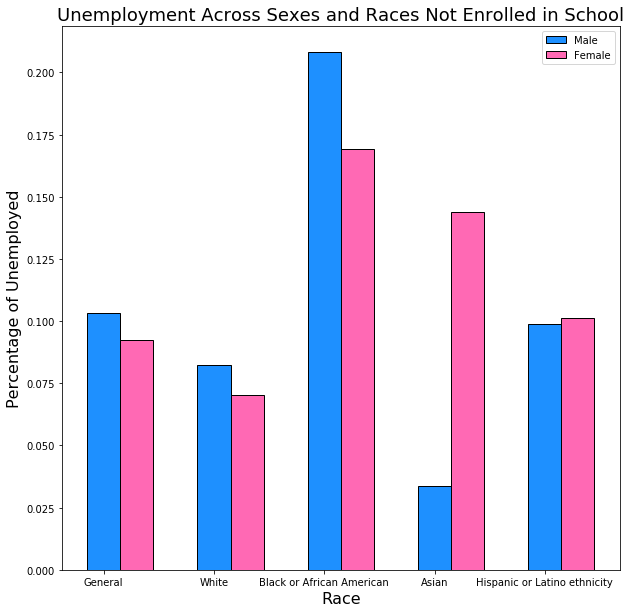

In [124]:
#Plotting a bar graph to see differences in unemployment rates.
pos = np.arange(5)
bar_width = 0.30
Sex=['Male','Female']
fig = plt.figure(figsize=(10,10))
plt.bar(pos,d_sexes_2[d_sexes_2['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'Men']['Percentage of Unemployed'],bar_width,color='dodgerblue',edgecolor='black')
plt.bar(pos+bar_width,d_sexes_2[d_sexes_2['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'Women']['Percentage of Unemployed'],bar_width, color='hotpink',edgecolor='black')
plt.xticks(pos, d_sexes_2['Race'])
plt.xlabel('Race', fontsize=16)
plt.ylabel('Percentage of Unemployed', fontsize=16)
plt.title('Unemployment Across Sexes and Races Not Enrolled in School',fontsize=18)
plt.legend(Sex,loc=1)
plt.show()

<d2>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Based on the information provided by the bar graphs, the unemployment rates across varying races and sexes indicate a discernible trend between people of different sexes. As described by both charts above, despite their educational enrollment status, men seemed to have higher unemployment rates than women. For the population who were enrolled in school, the general population of men had an unemployment rate of 10.3633%, whereas the general population of women had an unemployment rate of 6.6408%. As for the population who were not enrolled in school, the general population of men had an unemployment rate 10.3288%, whereas the general population of women had an unemployment rate of 9.2521%. Furthermore, the findings suggest that people of Asian ancestry has a distinct gap in unemployment rates. The data for both people who were either enrolled in school or not enrolled in school implied that Asian women had higher unemployment rates than Asian men. Throughout the entire dataset, the gap between gender unemployment statuses was the greatest between Asian women and Asian men who were not enrolled in school. Moreover, the findings also indicated that the Black or African American population tended to have the highest unemployment rates throughout all the other races. These unemployment rates ranged from 15% to 21% for African Americans who were either enrolled in school or not enrolled in school. Overall, these findings suggest a clear discrepancy in unemployment rates based on varying backgrounds. 
</d2>

### 2. Unemployment Rates For Varying Age Ranges and Races

#### Enrolled in School:

In [125]:
data_age = data[['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment', 'Total(Employed)', 'Total(Unemployed)', 'Race']]
data_age.head()
d_16_19 = data_age[data_age['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == '16 to 19 years'].head()
d_20_24 = data_age[data_age['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == '20 to 24 years'].head()
d_ages = d_16_19.append(d_20_24)
d_ages['Percentage of Unemployed'] = d_ages['Total(Unemployed)'] /(d_ages['Total(Employed)'] + d_ages['Total(Unemployed)'])
d_ages['Total'] = (d_ages['Total(Employed)'] + d_ages['Total(Unemployed)'])
d_ages

,"Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment",Total(Employed),Total(Unemployed),Race,Percentage of Unemployed,Total
2,16 to 19 years,3135.0,405.0,General,0.114407,3540.0
12,16 to 19 years,2497.0,296.0,White,0.105979,2793.0
22,16 to 19 years,308.0,100.0,Black or African American,0.245098,408.0
32,16 to 19 years,126.0,0.0,Asian,0.000000,126.0
42,16 to 19 years,598.0,95.0,Hispanic or Latino ethnicity,0.137085,693.0
3,20 to 24 years,3728.0,217.0,General,0.055006,3945.0
13,20 to 24 years,2834.0,129.0,White,0.043537,2963.0
23,20 to 24 years,428.0,45.0,Black or African American,0.095137,473.0
33,20 to 24 years,232.0,29.0,Asian,0.111111,261.0
43,20 to 24 years,738.0,52.0,Hispanic or Latino ethnicity,0.065823,790.0


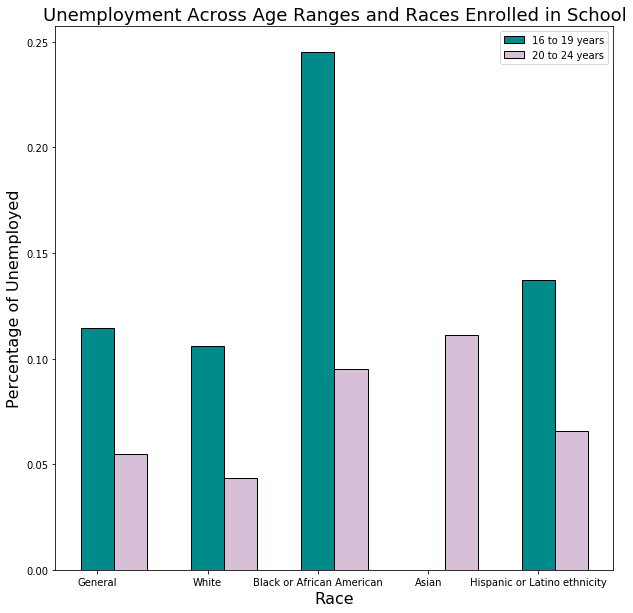

In [126]:
pos = np.arange(5)
bar_width = 0.30
AGE=['16 to 19 years','20 to 24 years']
fig = plt.figure(figsize=(10,10))
plt.bar(pos,d_ages[d_ages['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == '16 to 19 years']['Percentage of Unemployed'],bar_width,color='darkcyan',edgecolor='black')
plt.bar(pos+bar_width,d_ages[d_ages['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == '20 to 24 years']['Percentage of Unemployed'],bar_width, color='thistle',edgecolor='black')
plt.xticks(pos, d_ages['Race'])
plt.xlabel('Race', fontsize=16)
plt.ylabel('Percentage of Unemployed', fontsize=16)
plt.title('Unemployment Across Age Ranges and Races Enrolled in School',fontsize=18)
plt.legend(AGE,loc=1)
plt.show()

#### Not Enrolled in School:

In [127]:
data_age2 = data_2[['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment', 'Total(Employed)', 'Total(Unemployed)', 'Race']]
data_age2.head()
d_16_192 = data_age2[data_age2['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == '16 to 19 years'].head()
d_20_242 = data_age2[data_age2['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == '20 to 24 years'].head()
d_ages2 = d_16_192.append(d_20_242)
d_ages2['Percentage of Unemployed'] = d_ages2['Total(Unemployed)'] /(d_ages2['Total(Employed)'] + d_ages2['Total(Unemployed)'])
d_ages2['Total'] = (d_ages2['Total(Employed)'] + d_ages2['Total(Unemployed)'])
d_ages2

,"Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment",Total(Employed),Total(Unemployed),Race,Percentage of Unemployed,Total
52,16 to 19 years,1520.0,356.0,General,0.189765,1876.0
62,16 to 19 years,1130.0,212.0,White,0.157973,1342.0
72,16 to 19 years,247.0,94.0,Black or African American,0.275660,341.0
82,16 to 19 years,25.0,13.0,Asian,0.342105,38.0
92,16 to 19 years,391.0,114.0,Hispanic or Latino ethnicity,0.225743,505.0
53,20 to 24 years,10093.0,910.0,General,0.082705,11003.0
63,20 to 24 years,7754.0,526.0,White,0.063527,8280.0
73,20 to 24 years,1341.0,275.0,Black or African American,0.170173,1616.0
83,20 to 24 years,449.0,36.0,Asian,0.074227,485.0
93,20 to 24 years,2393.0,196.0,Hispanic or Latino ethnicity,0.075705,2589.0


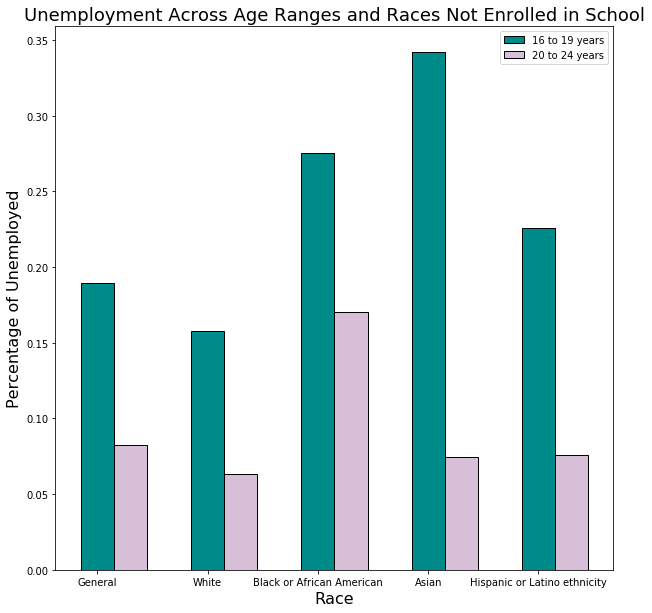

In [128]:
pos = np.arange(5)
bar_width = 0.30
AGE=['16 to 19 years','20 to 24 years']
fig = plt.figure(figsize=(10,10))
plt.bar(pos,d_ages2[d_ages2['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == '16 to 19 years']['Percentage of Unemployed'],bar_width,color='darkcyan',edgecolor='black')
plt.bar(pos+bar_width,d_ages2[d_ages2['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == '20 to 24 years']['Percentage of Unemployed'],bar_width, color='thistle',edgecolor='black')
plt.xticks(pos, d_ages2['Race'])
plt.xlabel('Race', fontsize=16)
plt.ylabel('Percentage of Unemployed', fontsize=16)
plt.title('Unemployment Across Age Ranges and Races Not Enrolled in School',fontsize=18)
plt.legend(AGE,loc=1)
plt.show()

<d4>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; According to the bar charts above, despite school enrollment, individuals who were between 16 to 19 years old had a higher unemployment rate compared to individuals who were 20 to 24 years old. However, it is evident, that people who were African American and 16 to 19 years old were among the backgrounds that had the highest unemployment rates. They are the first in having the highest unemployment rate for those who are enrolled in school and the second highest in unemployment rates for people who are not enrolled in school. It is also significant to note that the unemployment rate for Asian people who are between 16 to 19 years old drastically changed when considering school enrollment. For those who are not enrolled in school, they have the highest unemployment rate of 0.342105%. For those who are enrolled in school, they have the lowest unemployment rate of 0%. However, it is imperative to consider the small sample size of Asians in this dataset. Moreover, white individuals seemed to have lower unemployment rates than the general population for any criteria. Overall, this data indicates a clear disparity between people of different ages and race.
</d4>

### 3. Unemployment Rates For Educational Attainment Level Across Races

In [129]:
data_ED = data[['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment', 'Total(Employed)', 'Total(Unemployed)', 'Race']]
data_ED.head()
d_HB = data_ED[data_ED['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'Less than a high school diploma'].head()
d_H = data_ED[data_ED['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == "High school graduates, no college(1)"].head()
d_CA = data_ED[data_ED['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'Some college or associate degree'].head()
d_CB = data_ED[data_ED['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == "Bachelor's degree and higher(2)"].head()
d_EDS = d_HB.append(d_H).append(d_CA).append(d_CB)
d_EDS['Percentage of Unemployed'] = d_EDS['Total(Unemployed)'] /(d_EDS['Total(Employed)'] + d_EDS['Total(Unemployed)'])
d_EDS['Total'] = (d_EDS['Total(Employed)'] + d_EDS['Total(Unemployed)'])
#Mapping Encoded ranking for data.
d_EDS['key'] = d_EDS['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'].map( {"Less than a high school diploma" : 0,"High school graduates, no college(1)" : 1,"Some college or associate degree":2,"Bachelor's degree and higher(2)" : 3})

d_EDS

,"Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment",Total(Employed),Total(Unemployed),Race,Percentage of Unemployed,Total,key
56,Less than a high school diploma,963.0,253.0,General,0.208059,1216.0,0
66,Less than a high school diploma,748.0,148.0,White,0.165179,896.0,0
76,Less than a high school diploma,130.0,67.0,Black or African American,0.340102,197.0,0
86,Less than a high school diploma,7.0,16.0,Asian,0.695652,23.0,0
96,Less than a high school diploma,388.0,68.0,Hispanic or Latino ethnicity,0.149123,456.0,0
57,"High school graduates, no college(1)",4827.0,637.0,General,0.116581,5464.0,1
67,"High school graduates, no college(1)",3693.0,335.0,White,0.083168,4028.0,1
77,"High school graduates, no college(1)",727.0,209.0,Black or African American,0.223291,936.0,1
87,"High school graduates, no college(1)",108.0,16.0,Asian,0.129032,124.0,1
97,"High school graduates, no college(1)",1298.0,166.0,Hispanic or Latino ethnicity,0.113388,1464.0,1


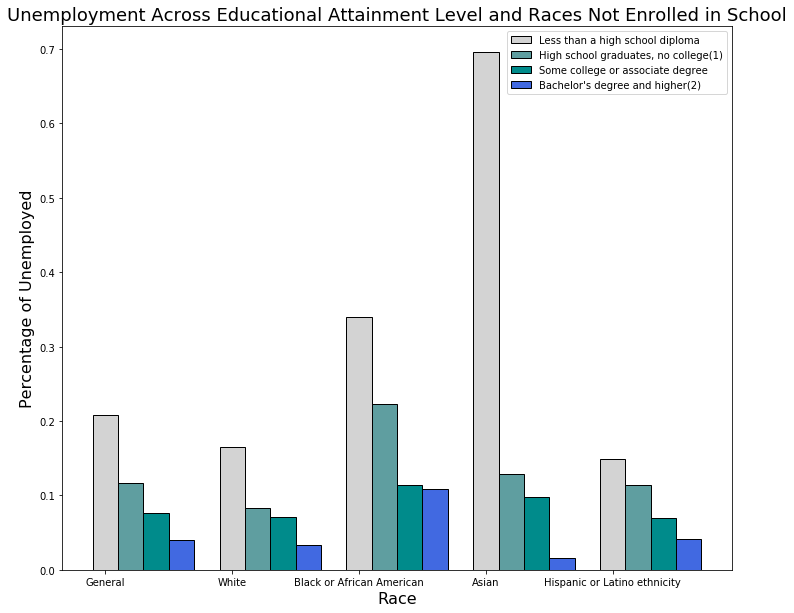

In [130]:
pos = np.arange(5)
bar_width = 0.20
ED=['Less than a high school diploma','High school graduates, no college(1)', "Some college or associate degree", "Bachelor's degree and higher(2)" ]
fig = plt.figure(figsize=(12,10))
plt.bar(pos,d_EDS[d_EDS['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'Less than a high school diploma']['Percentage of Unemployed'],bar_width,color='lightgray',edgecolor='black')
plt.bar(pos+bar_width,d_EDS[d_EDS['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'High school graduates, no college(1)']['Percentage of Unemployed'],bar_width, color='cadetblue',edgecolor='black')
plt.bar(pos+bar_width+bar_width,d_EDS[d_EDS['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == 'Some college or associate degree']['Percentage of Unemployed'],bar_width,color='darkcyan',edgecolor='black')
plt.bar(pos+bar_width+bar_width+bar_width,d_EDS[d_EDS['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment'] == "Bachelor's degree and higher(2)"]['Percentage of Unemployed'],bar_width, color='royalblue',edgecolor='black')
plt.xticks(pos, d_EDS['Race'])
plt.xlabel('Race', fontsize=16)
plt.ylabel('Percentage of Unemployed', fontsize=16)
plt.title('Unemployment Across Educational Attainment Level and Races Not Enrolled in School',fontsize=18)
plt.legend(ED,loc=1)
plt.show()

<d5>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; As suggested in the graph above, unemployment rates seemed to change depending on different educational attainment levels and races. However, it is evident that the unemployment rate between African Americans who have attained an Associate's degree and a Bachelor's degree did not vary as much as the other races. Despite this small change, it is clear that individuals who received a Bachelor's degree had a smaller unemployment rate than lower educational attainment levels for each race. According to the graph, there also appears to be some recurring and non-recurring trends in the unemployment rates. Similar to the previous conditions, people of white ethnicity had lower unemployment rates for all educational level standards than the general population. In this graph, people of Hispanic or Latino ethnicity appeared to reflect much of the unemployment rates for the general population. Ultimately, this graph reveals several unemployment rate discrepancies for people of different educational attainment levels and race.
</d5>

## Hypothesis Testing

In this section, chi-square tests and Pearson's correlation coefficient will be utilized to assess the data.

### 1. Unemployment Rates For Different Sexes and Races


#### Enrolled in School:

In [131]:
m_1 = [d_sexes['Total(Employed)'][4], d_sexes['Total(Unemployed)'][4]]
m_2 = [d_sexes['Total(Employed)'][14], d_sexes['Total(Unemployed)'][14]]
m_3 = [d_sexes['Total(Employed)'][24], d_sexes['Total(Unemployed)'][24]]
m_4 = [d_sexes['Total(Employed)'][34], d_sexes['Total(Unemployed)'][34]]
m_5 = [d_sexes['Total(Employed)'][44], d_sexes['Total(Unemployed)'][44]]

w_1 = [d_sexes['Total(Employed)'][5], d_sexes['Total(Unemployed)'][5]]
w_2 = [d_sexes['Total(Employed)'][15], d_sexes['Total(Unemployed)'][15]]
w_3 = [d_sexes['Total(Employed)'][25], d_sexes['Total(Unemployed)'][25]]
w_4 = [d_sexes['Total(Employed)'][35], d_sexes['Total(Unemployed)'][35]]
w_5 = [d_sexes['Total(Employed)'][45], d_sexes['Total(Unemployed)'][45]]
men = [m_1, m_2, m_3, m_4, m_5]
women = [w_1, w_2, w_3, w_4, w_5]

stats.chi2_contingency(men, women)


(27.186136518338905,
 1.8228548025695454e-05,
 4,
 array([[3010.09493671,  347.90506329],
        [2315.38869015,  267.61130985],
        [ 370.21119978,   42.78880022],
        [ 155.07636214,   17.92363786],
        [ 664.22881123,   76.77118877]]))

Text(0.5, 0.92, 'Chi-Square Distribution with 10 Degrees of Freedom')

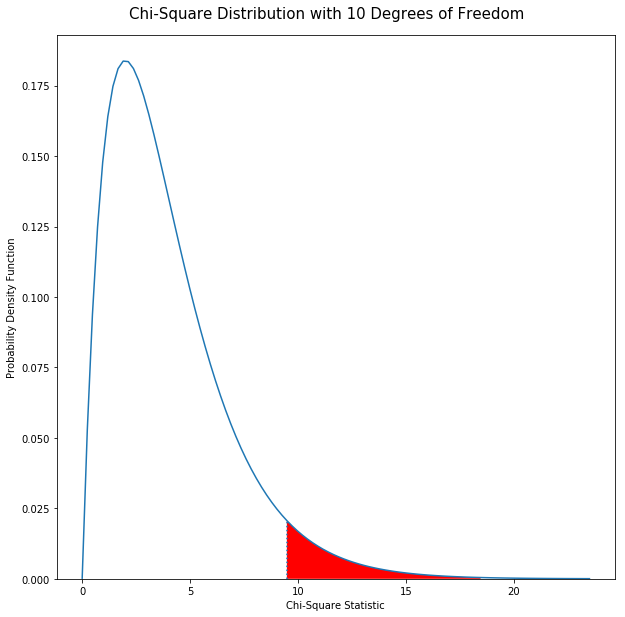

In [132]:
dist = stats.chi2(df=4)
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0000001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
#plt.plot([dist.ppf(0.025), dist.ppf(0.025)],[0, dist.pdf(dist.ppf(0.025))], linestyle='dotted', color='#1f77b4')
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with 10 Degrees of Freedom', fontsize=15, y=0.92)

### Results

H<sub>0</sub> = The employment status across all races for enrolled individuals are the same for males and females.

H<sub>a</sub> = The employment status across all races for enrolled individuals are different for males and females.

Chi-Square value = 27.186136518338905

P-value = 1.8228548025695454 x 10<sup>-05</sup>

Degrees of Freedom = 4

Expected Values = ([[3010.09493671,  347.90506329],
        [2315.38869015,  267.61130985],
        [ 370.21119978,   42.78880022],
        [ 155.07636214,   17.92363786],
        [ 664.22881123,   76.77118877]]))

Significance Level = 5%

Chi-Square Results = Because the p-value is less than the significance level (0.05), the null hypothesis is rejected and 
the employment status across all races for enrolled individuals are proven to be different for males and females.

#### Not Enrolled in School:

In [133]:
m_12 = [d_sexes_2['Total(Employed)'][54], d_sexes_2['Total(Unemployed)'][54]]
m_22 = [d_sexes_2['Total(Employed)'][64], d_sexes_2['Total(Unemployed)'][64]]
m_32 = [d_sexes_2['Total(Employed)'][74], d_sexes_2['Total(Unemployed)'][74]]
m_42 = [d_sexes_2['Total(Employed)'][84], d_sexes_2['Total(Unemployed)'][84]]
m_52 = [d_sexes_2['Total(Employed)'][94], d_sexes_2['Total(Unemployed)'][94]]

w_12 = [d_sexes_2['Total(Employed)'][55], d_sexes_2['Total(Unemployed)'][55]]
w_22 = [d_sexes_2['Total(Employed)'][65], d_sexes_2['Total(Unemployed)'][65]]
w_32 = [d_sexes_2['Total(Employed)'][75], d_sexes_2['Total(Unemployed)'][75]]
w_42 = [d_sexes_2['Total(Employed)'][85], d_sexes_2['Total(Unemployed)'][85]]
w_52 = [d_sexes_2['Total(Employed)'][95], d_sexes_2['Total(Unemployed)'][95]]
men2 = [m_12, m_22, m_32, m_42, m_52]
women2 = [w_12, w_22, w_32, w_42, w_52]

stats.chi2_contingency(men2, women2)

(156.08745946627798,
 1.00903505482739e-32,
 4,
 array([[6204.89221557,  698.10778443],
        [4714.5675316 ,  530.4324684 ],
        [ 876.39720559,   98.60279441],
        [ 213.93080506,   24.06919494],
        [1500.21224218,  168.78775782]]))

Text(0.5, 0.92, 'Chi-Square Distribution with 10 Degrees of Freedom')

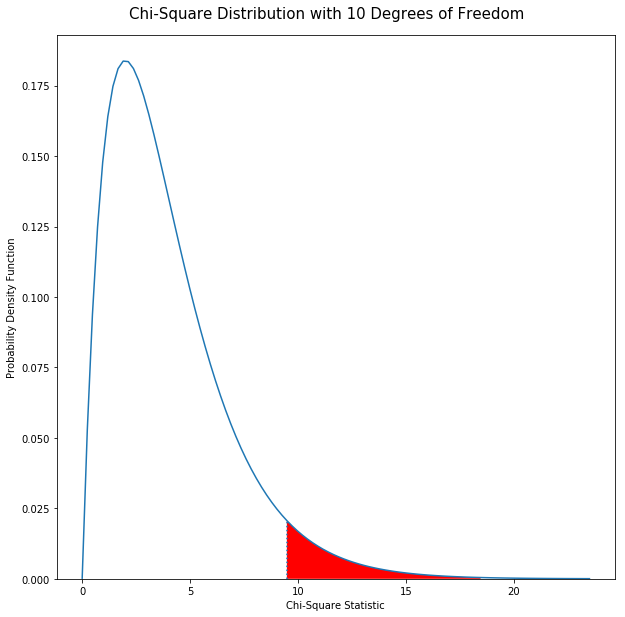

In [134]:
dist = stats.chi2(df=4)
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0000001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
#plt.plot([dist.ppf(0.025), dist.ppf(0.025)],[0, dist.pdf(dist.ppf(0.025))], linestyle='dotted', color='#1f77b4')
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with 10 Degrees of Freedom', fontsize=15, y=0.92)

### Results

H<sub>0</sub> = The employment status across all races for individuals who are not enrolled in school are the same for males and females.

H<sub>a</sub> = The employment status across all races for individuals who are not enrolled in school are different for males and females.

Chi-Square value = 156.08745946627798

P-value = 1.00903505482739 x 10<sup>-32</sup>

Degrees of Freedom = 4

Expected Values = ([[6204.89221557,  698.10778443],
        [4714.5675316 ,  530.4324684 ],
        [ 876.39720559,   98.60279441],
        [ 213.93080506,   24.06919494],
        [1500.21224218,  168.78775782]]))

Significance Level = 5%

Chi-Square Results = Because the p-value is less than the significance level (0.05), the null hypothesis is rejected and 
the employment status across all races for individuals who are not enrolled in school are proven to be different for males and females.

### 2. Unemployment Rates For Varrying Age Ranges and Races

#### Enrolled in School:

In [135]:
ma_1 = [d_ages['Total(Employed)'][2], d_ages['Total(Unemployed)'][2]]
ma_2 = [d_ages['Total(Employed)'][12], d_ages['Total(Unemployed)'][12]]
ma_3 = [d_ages['Total(Employed)'][22], d_ages['Total(Unemployed)'][22]]
ma_4 = [d_ages['Total(Employed)'][32], d_ages['Total(Unemployed)'][32]]
ma_5 = [d_ages['Total(Employed)'][42], d_ages['Total(Unemployed)'][42]]

wa_1 = [d_ages['Total(Employed)'][3], d_ages['Total(Unemployed)'][3]]
wa_2 = [d_ages['Total(Employed)'][13], d_ages['Total(Unemployed)'][13]]
wa_3 = [d_ages['Total(Employed)'][23], d_ages['Total(Unemployed)'][23]]
wa_4 = [d_ages['Total(Employed)'][33], d_ages['Total(Unemployed)'][33]]
wa_5 = [d_ages['Total(Employed)'][43], d_ages['Total(Unemployed)'][43]]
age1 = [ma_1, ma_2, ma_3, ma_4, ma_5]
age2 = [wa_1, wa_2, wa_3, wa_4, wa_5]

stats.chi2_contingency(age1, age2)


(86.57734867001271,
 7.018758319994486e-18,
 4,
 array([[3120.44444444,  419.55555556],
        [2461.97777778,  331.02222222],
        [ 359.64444444,   48.35555556],
        [ 111.06666667,   14.93333333],
        [ 610.86666667,   82.13333333]]))

Text(0.5, 0.92, 'Chi-Square Distribution with 10 Degrees of Freedom')

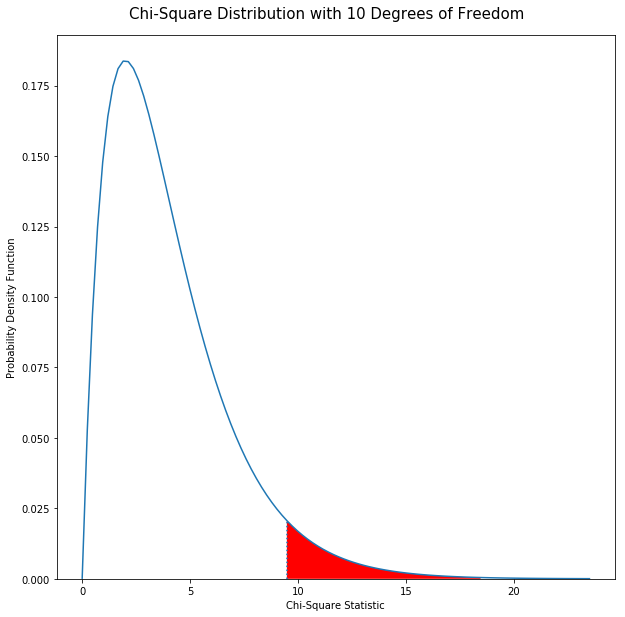

In [136]:
dist = stats.chi2(df=4)
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0000001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
#plt.plot([dist.ppf(0.025), dist.ppf(0.025)],[0, dist.pdf(dist.ppf(0.025))], linestyle='dotted', color='#1f77b4')
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with 10 Degrees of Freedom', fontsize=15, y=0.92)

### Results

H<sub>0</sub> = The employment status across all races for individuals who are enrolled in school are the same for 16 to 19 year olds and 20 to 24 year olds.

H<sub>a</sub> = The employment status across all races for individuals who are enrolled in school are different for 16 to 19 year olds and 20 to 24 year olds.

Chi-Square value = 86.57734867001271

P-value =  7.018758319994486 x 10<sup>-18</sup>

Degrees of Freedom = 4

Expected Values = ([[3120.44444444,  419.55555556],
        [2461.97777778,  331.02222222],
        [ 359.64444444,   48.35555556],
        [ 111.06666667,   14.93333333],
        [ 610.86666667,   82.13333333]]))

Significance Level = 5%

Chi-Square Results = Because the p-value is less than the significance level (0.05), the null hypothesis is rejected and 
the employment status across all races for individuals who are enrolled in school are proven to be different for 16 to 19 year olds and 20 to 24 year olds.

In [137]:
ma_12 = [d_ages2['Total(Employed)'][52], d_ages2['Total(Unemployed)'][52]]
ma_22 = [d_ages2['Total(Employed)'][62], d_ages2['Total(Unemployed)'][62]]
ma_32 = [d_ages2['Total(Employed)'][72], d_ages2['Total(Unemployed)'][72]]
ma_42 = [d_ages2['Total(Employed)'][82], d_ages2['Total(Unemployed)'][82]]
ma_52 = [d_ages2['Total(Employed)'][92], d_ages2['Total(Unemployed)'][92]]

wa_12 = [d_ages2['Total(Employed)'][53], d_ages2['Total(Unemployed)'][53]]
wa_22 = [d_ages2['Total(Employed)'][63], d_ages2['Total(Unemployed)'][63]]
wa_32 = [d_ages2['Total(Employed)'][73], d_ages2['Total(Unemployed)'][73]]
wa_42 = [d_ages2['Total(Employed)'][83], d_ages2['Total(Unemployed)'][83]]
wa_52 = [d_ages2['Total(Employed)'][93], d_ages2['Total(Unemployed)'][93]]
age12 = [ma_12, ma_22, ma_32, ma_42, ma_52]
age22 = [wa_12, wa_22, wa_32, wa_42, wa_52]

stats.chi2_contingency(age12, age22)


(34.635029837606965,
 5.520334375150357e-07,
 4,
 array([[1515.16040956,  360.83959044],
        [1083.872745  ,  258.127255  ],
        [ 275.41028766,   65.58971234],
        [  30.6908825 ,    7.3091175 ],
        [ 407.86567528,   97.13432472]]))

Text(0.5, 0.92, 'Chi-Square Distribution with 10 Degrees of Freedom')

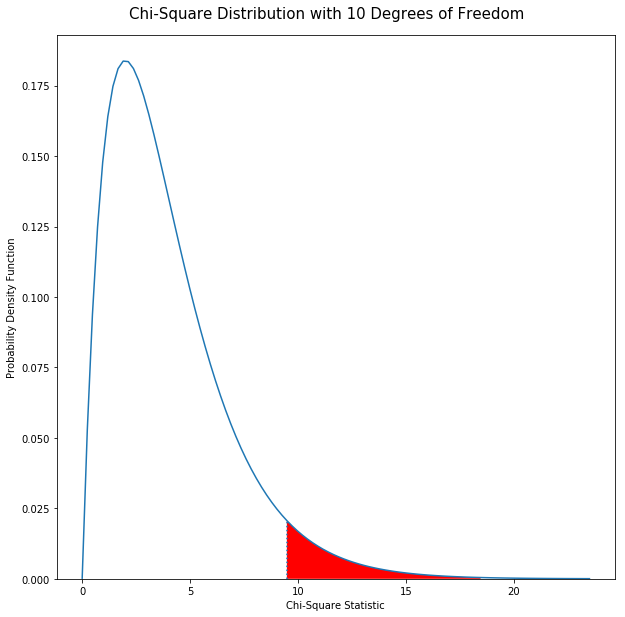

In [138]:
dist = stats.chi2(df=4)
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0000001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
#plt.plot([dist.ppf(0.025), dist.ppf(0.025)],[0, dist.pdf(dist.ppf(0.025))], linestyle='dotted', color='#1f77b4')
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with 10 Degrees of Freedom', fontsize=15, y=0.92)

### Results

H<sub>0</sub> = The employment status across all races for individuals who are not enrolled in school are the same for 16 to 19 year olds and 20 to 24 year olds.

H<sub>a</sub> = The employment status across all races for individuals who are not enrolled in school are different for 16 to 19 year olds and 20 to 24 year olds.

Chi-Square value = 34.635029837606965

P-value =  5.520334375150357 x 10<sup>-07</sup>

Degrees of Freedom = 4

Expected Values = ([[1515.16040956,  360.83959044],
        [1083.872745  ,  258.127255  ],
        [ 275.41028766,   65.58971234],
        [  30.6908825 ,    7.3091175 ],
        [ 407.86567528,   97.13432472]]))
        
Significance Level = 5%

Chi-Square Results = Because the p-value is less than the significance level (0.05), the null hypothesis is rejected and 
the employment status across all races for individuals who are not enrolled in school are proven to be different for 16 to 19 year olds and 20 to 24 year olds.

### 3. Unemployment Rates For Educational Attainment Level Across Races


Text(0.5, 0.92, 'Unemployment Across Age Ranges and Races Not Enrolled in School')

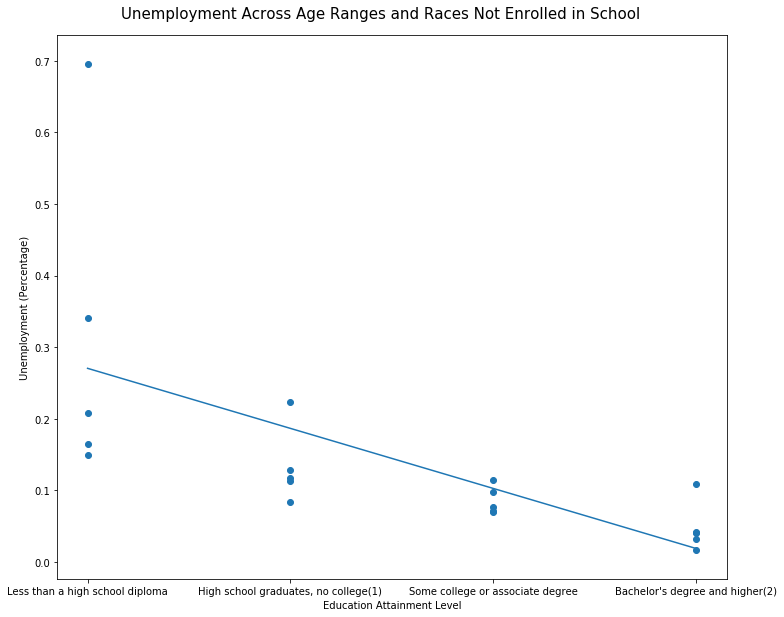

In [139]:
education = d_EDS['Enrollment status, age, sex, race, Hispanic or Latino ethnicity, and educational attainment']
percentage= d_EDS['Percentage of Unemployed']
keys = d_EDS['key']
#Get Slope and Intercept
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

slope, intercept, predictions, residuals= evaluate_linear_relationship(keys,percentage)

fig = plt.figure(figsize=(12,10))
plt.scatter(education, percentage)
plt.plot(keys, keys*slope + intercept)
plt.xlabel('Education Attainment Level')
plt.ylabel('Unemployment (Percentage)')
fig.suptitle('Unemployment Across Age Ranges and Races Not Enrolled in School', fontsize=15, y=0.92)

Text(0.5, 0.92, 'Residuals')

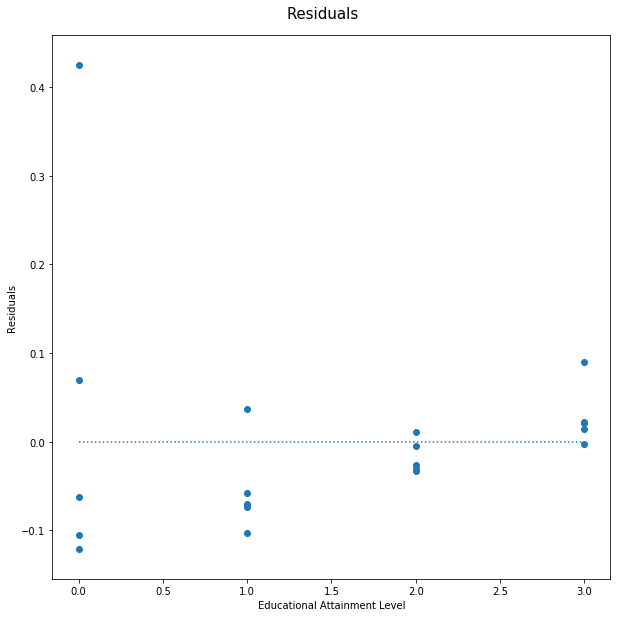

In [140]:
fig = plt.figure(figsize=(10,10))
plt.scatter(keys, residuals)
plt.plot([0, keys.max()], [0,0], linestyle='dotted')
plt.xlabel('Educational Attainment Level')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

In [141]:
#R-Squared Value
np.var(predictions) / np.var(percentage)

0.4100768928691522

<d6>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Based on the results for all of the chi-square tests, the null hypothesis - the distributions for two backgrounds were the same - for each criteria were rejected and proved that each distinct background had discrepant unemployment rates. These results seemed to not be affected by chance because each test resulted in p-values that were extremely lower than the significance level of 5%. Furthermore, for educational attainment levels, there appears to be a weak, negative linear relationship between education attainment levels and unemployment rates. This suggests that higher education attainment levels correlate to lower rates of unemployment in a weak linear fashion. By dividing the variance of the predicted values and the variance of the actual values, the r<sup>2</sup>-value is determined to be 0.4100768928691522. This result is expected because this data pertains to a circumstance relating to humans, which is affected by several confounding variables. Nevertheless, these outcomes indicate that there exists discrepancies in unemployment rates for differing backgrounds.
</d6>

## Conclusion

<d6>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In conclusion, unemployment rates between people of different backgrounds vary depending on their age, race, educational level, and gender. In all cases, white individuals appeared to have lower unemployment rates than the general population, whereas African American individuals always had higher unemployment rates than the general population. Moreover, both Asian and African American people tended to have either the highest unemployment rates or the lowest unemployment for different backgrounds. Furthermore, as seen in the distribution for varying educational attainment levels across all races, unemployment rates seemed to decrease as educational levels increased. Although the r-squared value was 0.4100768928691522, it does not imply that the increase in education levels causes lower unemployment rates; it only entails that there is a possible correlation between the two variables. Furthermore, it is imperative to mention that unemployment rates for the Asian population seemed to alternate drastically as different backgrounds were considered. Furthermore, it is notable that men predominantly had higher unemployment rates than women. For instance, the general population of men who were either enrolled or not enrolled in school had higher unemployment rates than women. It is also significant to acknowledge that younger individuals had higher unemployment rates than older individuals. Hence, it is discernible that unemployment discrepancies are a prevailing issue in modern society.
</d6> 